In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("/content/winequality-red.csv",delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df['quality'] = df['quality'].astype('int')

In [12]:
df['citric acid'] = np.sqrt(df['citric acid'])
df['citric acid'].head()

0    0.000000
1    0.000000
2    0.200000
3    0.748331
4    0.000000
Name: citric acid, dtype: float64

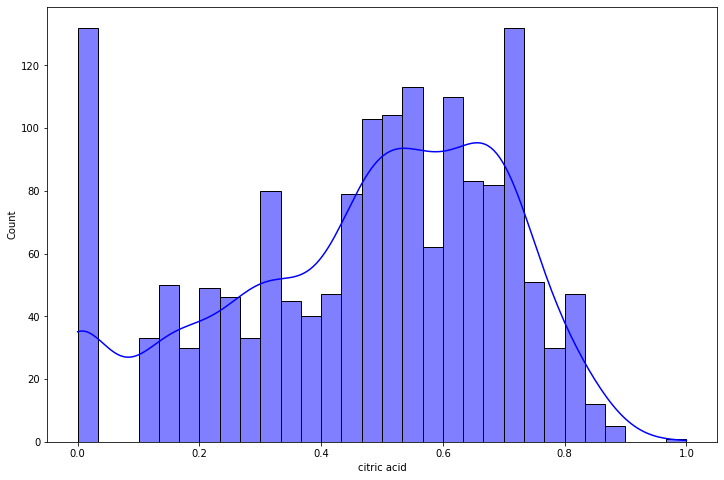

In [13]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x='citric acid',kde=True, bins=30, color='blue')
plt.show()

In [14]:
df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])
df['free sulfur dioxide'].head()

0    3.316625
1    5.000000
2    3.872983
3    4.123106
4    3.316625
Name: free sulfur dioxide, dtype: float64

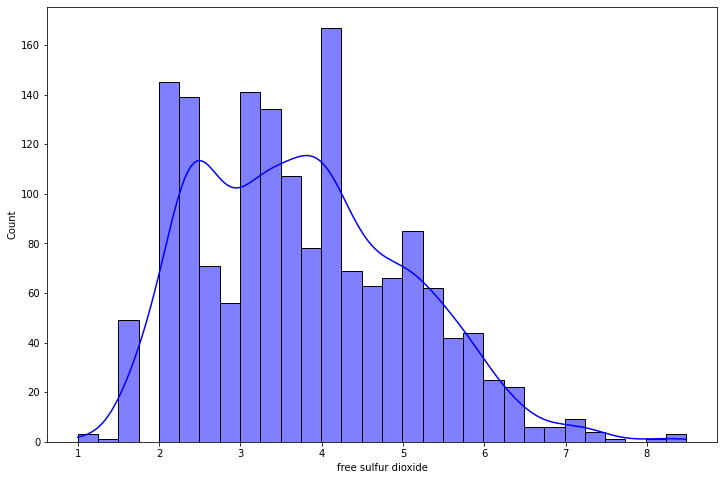

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x='free sulfur dioxide',kde=True, bins=30,color='blue')
plt.show();

In [16]:
df['total sulfur dioxide'] = np.sqrt(df['total sulfur dioxide'])
df['total sulfur dioxide'].head()

0    5.830952
1    8.185353
2    7.348469
3    7.745967
4    5.830952
Name: total sulfur dioxide, dtype: float64

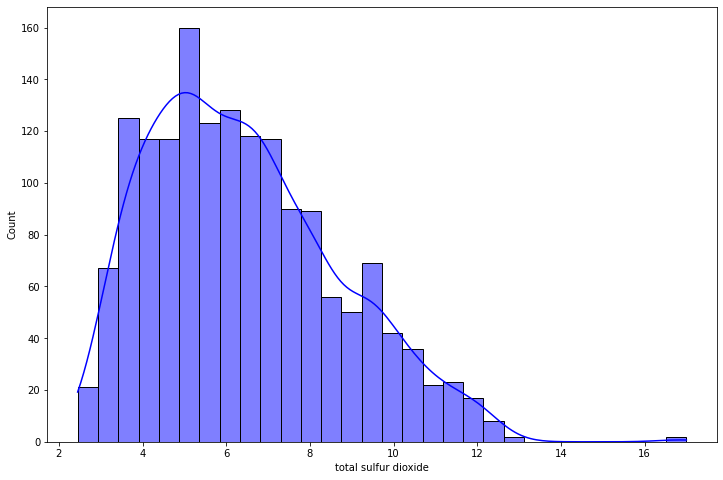

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x='total sulfur dioxide',kde=True, bins=30,color='blue')
plt.show()

In [18]:
df['alcohol'] = np.log(df['alcohol'])
df['alcohol'].head()

0    2.240710
1    2.282382
2    2.282382
3    2.282382
4    2.240710
Name: alcohol, dtype: float64

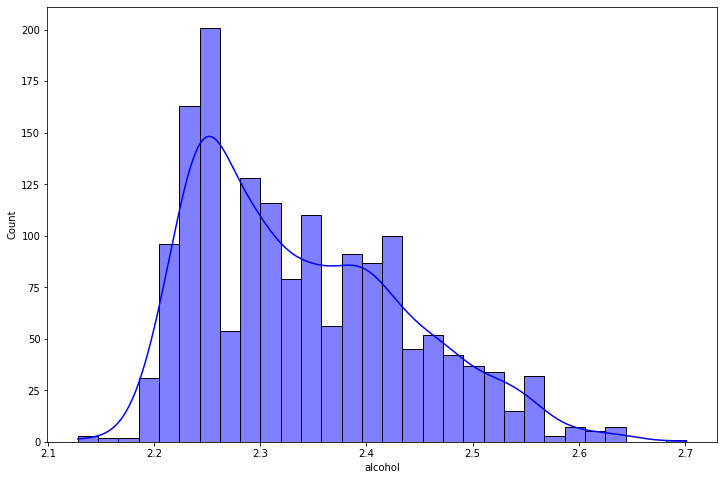

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x='alcohol',kde=True, bins=30, color='blue')
plt.show();

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.615564,0.114777,0.093705,-0.170652,-0.118819,0.668047,-0.682978,0.183006,-0.057959,0.124052
volatile acidity,-0.256131,1.000000,-0.557720,0.001918,0.061298,0.001242,0.077561,0.022026,0.234937,-0.260987,-0.201444,-0.390558
citric acid,0.615564,-0.557720,1.000000,0.134923,0.163771,-0.046351,0.076331,0.338766,-0.538733,0.284239,0.064430,0.206682
residual sugar,0.114777,0.001918,0.134923,1.000000,0.055610,0.145921,0.177869,0.355283,-0.085652,0.005527,0.039034,0.013732
chlorides,0.093705,0.061298,0.163771,0.055610,1.000000,-0.000676,0.056220,0.200632,-0.265026,0.371260,-0.225791,-0.128907
free sulfur dioxide,-0.170652,0.001242,-0.046351,0.145921,-0.000676,1.000000,0.739076,-0.033398,0.085497,0.055537,-0.077772,-0.051474
total sulfur dioxide,-0.118819,0.077561,0.076331,0.177869,0.056220,0.739076,1.000000,0.089913,-0.040075,0.055978,-0.230976,-0.184192
density,0.668047,0.022026,0.338766,0.355283,0.200632,-0.033398,0.089913,1.000000,-0.341699,0.148506,-0.490948,-0.174919
pH,-0.682978,0.234937,-0.538733,-0.085652,-0.265026,0.085497,-0.040075,-0.341699,1.000000,-0.196648,0.206209,-0.057731
sulphates,0.183006,-0.260987,0.284239,0.005527,0.371260,0.055537,0.055978,0.148506,-0.196648,1.000000,0.093669,0.251397


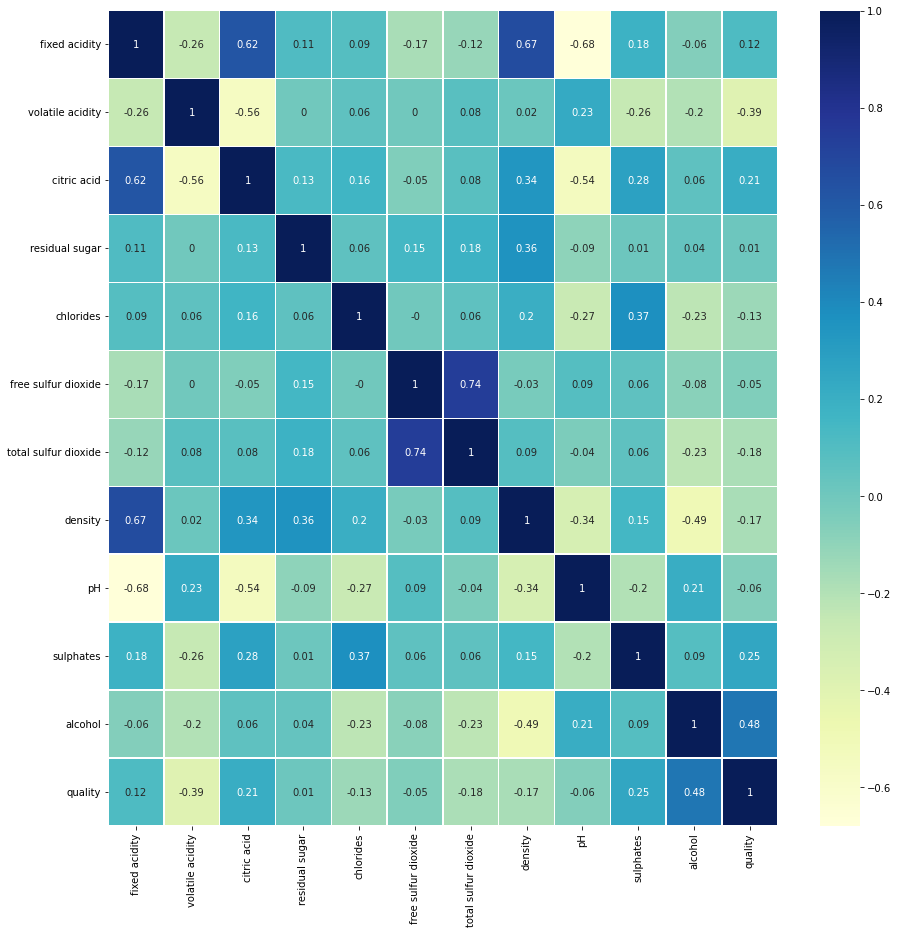

In [21]:
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(data=correlation_matrix, cmap="YlGnBu", annot=True,linewidths=0.30)

In [22]:
x=df.drop("quality",axis=1)

In [23]:
y=df["quality"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=5)

In [25]:
print(x_train.shape)
print(x_test.shape)

(1071, 11)
(528, 11)


In [26]:
print(y_train.shape)
print(y_test.shape)

(1071,)
(528,)


In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.67922262,  0.59626068, -2.01235722, ...,  0.41210014,
        -0.46806601, -1.45737161],
       [ 1.8302001 , -0.30790489,  0.84071048, ...,  0.47742862,
         1.11903978, -0.47792044],
       [-0.39406095,  2.46110218, -0.08881937, ...,  0.34677165,
        -1.26161891,  0.51096301],
       ...,
       [-1.07844896, -0.75998768,  0.05040732, ...,  0.86939954,
        -0.63811306,  1.58426377],
       [-1.1354813 , -0.81649802, -0.40300999, ...,  0.86939954,
        -0.07128957,  0.69781287],
       [ 1.6591031 , -1.04253942,  0.87294956, ..., -2.39702474,
        -0.01460722, -1.23150627]])

In [29]:
from sklearn.svm import SVC
svc = SVC()

In [30]:
svc.fit(x_train, y_train)

SVC()

In [31]:
import pickle
pickle.dump(svc, open('svc.pkl', 'wb'))

In [32]:
svc.predict(x_train)

array([5, 6, 5, ..., 6, 6, 6])

In [33]:
y_pred_svc = svc.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.71      0.42      0.52       236
           6       0.43      0.85      0.57       196
           7       0.00      0.00      0.00        71
           8       0.00      0.00      0.00         7

    accuracy                           0.50       528
   macro avg       0.19      0.21      0.18       528
weighted avg       0.48      0.50      0.44       528



In [36]:
confusion_matrix(y_test,y_pred_svc)

array([[  0,   0,   0,   5,   0,   0],
       [  0,   0,   2,  11,   0,   0],
       [  0,   0,  98, 138,   0,   0],
       [  0,   0,  30, 166,   0,   0],
       [  0,   0,   7,  64,   0,   0],
       [  0,   0,   1,   6,   0,   0]])

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear', 'rbf']}
model = GridSearchCV(svc,param_grid,scoring = "neg_mean_squared_error",cv = 5,verbose=3)

In [39]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.614 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.645 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.654 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.612 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.593 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.949 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.860 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.902 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.935 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.925 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=linear;, score=-0.614 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=linear;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [40]:
print(model.best_params_)
print(model.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
-0.5303499239295805


In [41]:
model.predict(x_train)

array([5, 6, 5, ..., 5, 6, 6])

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
grid_model_predictions = model.predict(x_test)
print("--------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test,grid_model_predictions))
print("--------------------------------------")
print("Classification report")
print(classification_report(y_test,grid_model_predictions))
print("--------------------------------------")

--------------------------------------
Confusion Matrix
[[  0   0   5   0   0   0]
 [  0   0   7   6   0   0]
 [  0   0 193  43   0   0]
 [  0   0  65 129   2   0]
 [  0   0   4  63   4   0]
 [  0   0   0   7   0   0]]
--------------------------------------
Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.70      0.82      0.76       236
           6       0.52      0.66      0.58       196
           7       0.67      0.06      0.10        71
           8       0.00      0.00      0.00         7

    accuracy                           0.62       528
   macro avg       0.32      0.26      0.24       528
weighted avg       0.60      0.62      0.57       528

--------------------------------------


In [44]:
x.shape

(1599, 11)

In [45]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [46]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
sampled_x, sampled_y = resample.fit_resample(x, y)

In [47]:
print(sampled_x.shape)
print(sampled_y.shape)

(4086, 11)
(4086,)


In [48]:
x_train_rs, x_test_rs, y_train_rs, y_test_rs = train_test_split(sampled_x, sampled_y, test_size = 0.33, random_state=5)

In [49]:
scaler.fit_transform(x_train_rs)
scaler.transform(x_test_rs)

array([[ 0.60225026, -0.77480967,  1.09350504, ..., -0.82301576,
         0.19456891,  1.39631798],
       [ 0.82198261, -0.92036402,  0.79687683, ..., -0.50352499,
         1.02715459,  0.04038952],
       [-1.93948182, -0.65090958,  0.17512218, ...,  2.54888267,
         0.54307665,  2.58217667],
       ...,
       [ 0.82004639, -0.81730971,  0.49631366, ..., -0.89524815,
         0.25722402, -0.5906187 ],
       [-0.04952927,  1.00018323, -1.45698864, ...,  1.46791081,
         0.21239711, -0.85819664],
       [ 0.02263196, -1.31610332,  0.75995168, ..., -0.23037634,
         0.32717226,  1.61835466]])

In [ ]:
model.fit(x_train_rs,y_train_rs)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-1.693 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-1.387 total time=   0.2s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-1.285 total time=   0.3s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-1.534 total time=   0.2s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-1.393 total time=   0.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.332 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.235 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.139 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.506 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.512 total time=   0.5s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=linear;, score=-1.693 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=linear;

In [ ]:
print(model.best_params_)
print(model.best_score_)

In [ ]:
model.predict(x_train_rs)

In [ ]:
grid_model_predictions_rs = model.predict(x_test_rs)
print("--------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test_rs,grid_model_predictions_rs))
print("--------------------------------------")
print("Classification report")
print(classification_report(y_test_rs,grid_model_predictions_rs))
print("--------------------------------------")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(x_train_rs,y_train_rs)

In [ ]:
lr_model.predict(x_train_rs)

In [ ]:
lr_model_predictions = lr_model.predict(x_test_rs)
print("--------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test_rs,lr_model_predictions))
print("--------------------------------------")
print("Classification report")
print(classification_report(y_test_rs,lr_model_predictions))
print("--------------------------------------")

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Final Test Accuracy Score of all the Models")
print("-------------------------------------------")
print("SVC without optimization:" , accuracy_score(y_test,y_pred_svc))
print("SVC after grid search cv optimization:", accuracy_score(y_test,grid_model_predictions))
print("SVC after sampling using grid search cv:", accuracy_score(y_test_rs,grid_model_predictions_rs))
print("Logistic Regression:", accuracy_score(y_test_rs,lr_model_predictions))